In [1]:
from __future__ import print_function, division
from error import DT
from error import load

In [2]:
data = load()
x_content = []
x_label_old = []
for project in data:
    x_content += [c.decode("utf8","ignore") for c in data[project]["Abstract"]]
    x_label_old += [c for c in data[project]["code"]]



In [3]:
treatment = DT(x_content,x_content)
treatment.preprocess()
treatment.train(x_label_old)        

In [4]:
treatment.draw()

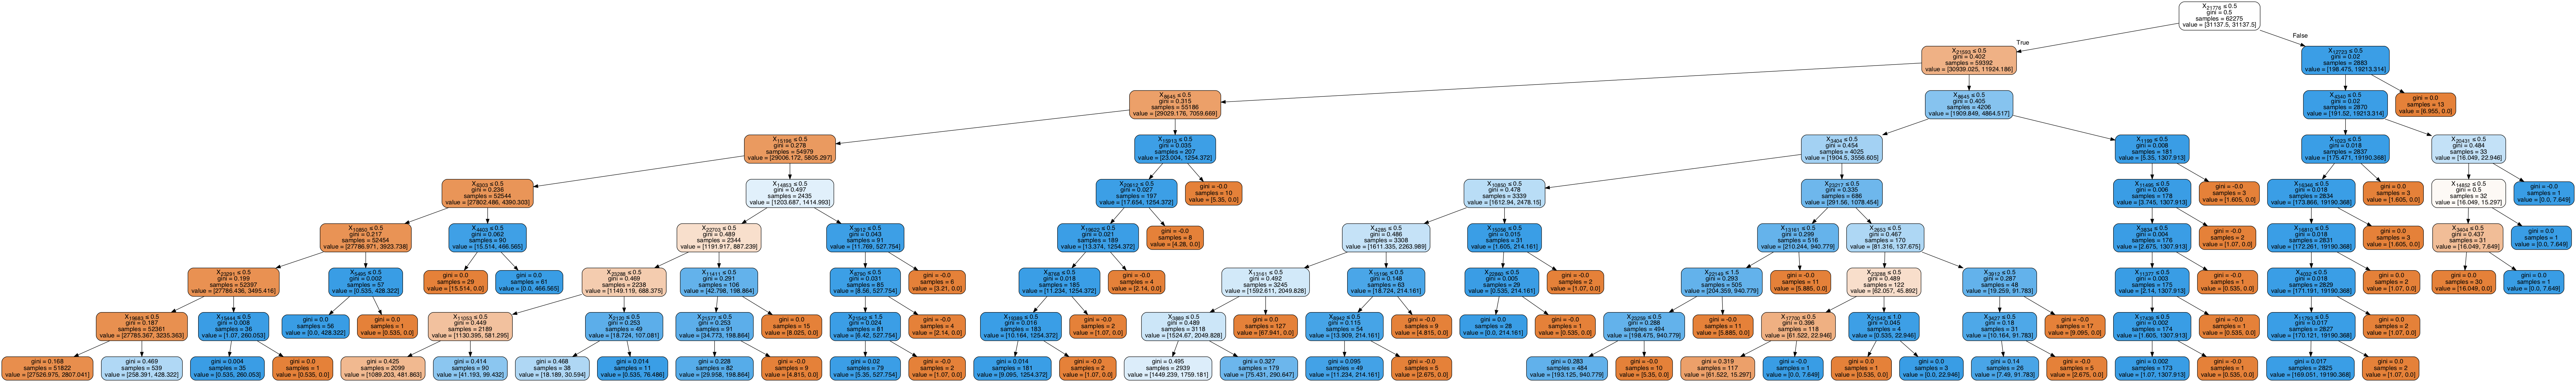

In [5]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(treatment.model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
features = treatment.model.feature_importances_
order = np.argsort(features)[::-1][:20]
out = []
for o in order:
    out.append((treatment.voc[o],features[o]))
print(out)


[(u'todo', 0.6023778014830556), (u'this', 0.1386244240230599), (u'fixme', 0.08411111603653462), (u'not', 0.03555850400351658), (u'hack', 0.032672013232663354), (u'defer', 0.03012425289702724), (u'workaround', 0.018328634862124302), (u'should', 0.016870710084611974), (u'needed', 0.011598876989213417), (u'used', 0.003821345338401299), (u'work', 0.003545105950448969), (u'be', 0.0034696349305341698), (u'change', 0.0024816856826752813), (u'last', 0.00230411440714099), (u'here', 0.0018421156719806886), (u'but', 0.0017654408672274477), (u'checking', 0.0013369120953504383), (u'by', 0.0008776927659250179), (u'and', 0.0007854008269630515), (u'javajetinc', 0.0006068529914536307)]
